In [1]:
# -*- coding: utf-8 -*-
###
# Demonstration of MR reconstruction with CCP PET-MR Software
#
# This demonstration shows how to reconstruct MR images from fully sampled 
# Cartesian k-psace data 
#
# This demo is a 'script', i.e. intended to be run step by step in a
# Python IDE such as spyder. It is organised in 'cells'. spyder displays these
# cells nicely and allows you to run each cell on its own.
#
# First version: 27th of May 2017
# Author: Christoph Kolbitsch
#

## CCP PETMR Synergistic Image Reconstruction Framework (SIRF).
## Copyright 2015 - 2017 Rutherford Appleton Laboratory STFC.
## Copyright 2015 - 2017 University College London.
## Copyright 2015 - 2017 Physikalisch-Technische Bundesanstalt.
##
## This is software developed for the Collaborative Computational
## Project in Positron Emission Tomography and Magnetic Resonance imaging
## (http://www.ccppetmr.ac.uk/).
##
## Licensed under the Apache License, Version 2.0 (the "License");
##   you may not use this file except in compliance with the License.
##   You may obtain a copy of the License at
##       http://www.apache.org/licenses/LICENSE-2.0
##   Unless required by applicable law or agreed to in writing, software
##   distributed under the License is distributed on an "AS IS" BASIS,
##   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
##   See the License for the specific language governing permissions and
##   limitations under the License.

__version__ = '0.1.0'

# import engine module
import pGadgetron as pMR

# import further modules
import os
%matplotlib
import matplotlib.pyplot as plt



Using matplotlib backend: TkAgg


In [2]:
#%% GO TO MR FOLDER
os.chdir(pMR.petmr_data_path('mr'))



In [3]:
#%% LOAD RAW MR DATA
# MR raw data formats from different vendors can be transformed to 
# HDF file format using siemens_to_ismrmrd, philips_to_ismrmrd or
# bruker_to_ismrmrd on https://github.com/ismrmrd/.
# Acquisition data will be read from an HDF file input_file
acq_data = pMR.AcquisitionData('simulated_MR_2D_cartesian.h5')




In [4]:
#%% PRE-PROCESS MR RAW DATA
# prior to image reconstruction several pre-processing steps such as 
# asymmetric echo compensation, noise decorelation for multi-coil data or 
# removal of oversampling along frequency encoding (i.e. readout or kx)
# direction. So far only the removal of readout oversampling and noise and
# asymmetric echo adjusting is implemented
preprocessed_data = pMR.preprocess_acquisition_data(acq_data)




In [5]:
#%% SETUP MR RECONSTRUCTION
# create a reconstruction object using 2D inverse Fourier transform 
recon = pMR.FullySampledReconstructor()




In [6]:
#%% PASS RAW DATA TO RECONSTRUCTOR
recon.set_input(preprocessed_data)




In [7]:
#%% PERFORM RECONSTRUCTION
recon.process()




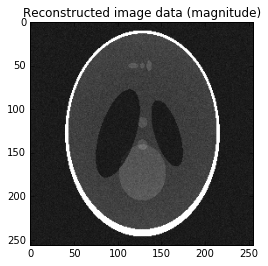

In [8]:
#%% RETRIEVE AND VIEW IMAGE
image_data = recon.get_output()
image_array = abs(image_data.as_array())
image_array = image_array/image_array.max()

plt.close()
plt.figure(1)
plt.set_cmap('gray')
plt.imshow(image_array[0,:,:], vmin=0, vmax=0.7)
plt.title('Reconstructed image data (magnitude)') 





In [9]:
plt.close('all')